<a href="https://colab.research.google.com/github/HermelaDev/Cats-vs-Dogs_Image_Classification_DL_CNN/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2025-07-14 13:42:04--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.56.30.64, 2600:1413:a000:7a6::317f, 2600:1413:a000:796::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.56.30.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  69.8MB/s    in 11s     

2025-07-14 13:42:16 (68.6 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [6]:
#!unzip kagglecatsanddogs_5340.zip

## Importing libraries

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os # Used for Listing image files, loading data from directories, creating folders.
import tqdm # A progress bar library: Used for Showing progress when loading images or training in a loop.
import random # For generating random numbers. Used for Randomly selecting or shuffling images, setting seeds for reproducibility.
from keras.preprocessing.image import load_img # A tool from Keras to load images and convert them to arrays. Used for Reading image files and resizing them to feed into the model.
warnings.filterwarnings('ignore') # Tells Python to hide any warning messages.

## Create a Dataframe

In [7]:
input_path = []  # List to store image file paths
label = []       # List to store image labels (0 = Cat, 1 = Dog)

for class_name in os.listdir('PetImages'):  # Loop through 'Cat' and 'Dog' folders
    folder_path = os.path.join('PetImages', class_name)  # Full path to the folder

    if not os.path.isdir(folder_path):  # Skip if it's not a folder
        continue

    for path in os.listdir(folder_path):  # Loop through image files in the folder
        file_path = os.path.join('PetImages', class_name, path)  # Full image path
        input_path.append(file_path)  # Add image path to list

        if class_name == 'Cat':
            label.append(0)  # Label 0 for Cat
        else:
            label.append(1)  # Label 1 for Dog

df = pd.DataFrame({'Image': input_path, 'Label': label})  # Create DataFrame
df.head()


,Image,Label
0,PetImages/Cat/10004.jpg,0
1,PetImages/Cat/11720.jpg,0
2,PetImages/Cat/6118.jpg,0
3,PetImages/Cat/1863.jpg,0
4,PetImages/Cat/11982.jpg,0


In [8]:
df.shape

(25002, 2)

In [ ]:
# Import the Image class for opening and verifying image files
from PIL import Image

- Image is a class from the PIL (Pillow) library.

- We use it to open, check, or manipulate images (like resizing, verifying, converting formats, etc.).

## Detect and Exclude Non-JPG and Corrupt Images

In [ ]:
bad_images = []  # List to store paths of invalid or unreadable images

for image in df['Image']:  # Loop through each image path in the DataFrame

    if not image.lower().endswith('.jpg'):  # Check if the file does not end with '.jpg'
        bad_images.append(image)            # Add non-jpg file to the list of bad images
        continue                            # Skip further checks and move to the next image

    try:
        img = Image.open(image)  # Try to open the image file
        img.verify()             # Verify that the image is not corrupted or incomplete
    except:
        bad_images.append(image)  # If an error occurs (image is corrupted), add to bad images

bad_images

# Remove all bad files from the DataFrame
df = df[~df['Image'].isin(bad_images)].reset_index(drop=True)

## Exploratory Data Analysis

> Visualizing Dog Images in a Grid


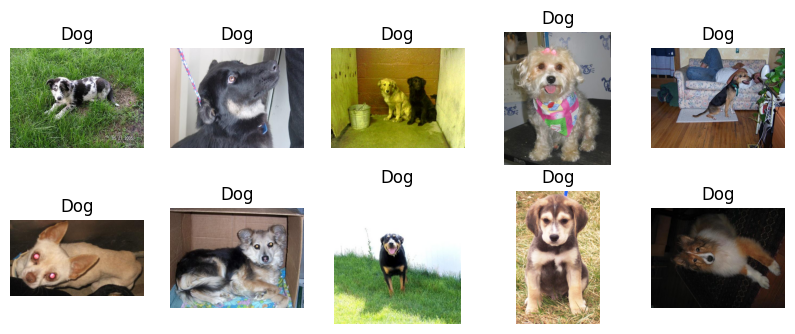

In [ ]:
# Display a grid of 10 random dog images to understand the content of the dataset

plt.figure(figsize=(10, 10))  # Create a large figure to hold 10 images in a grid

# Filter the DataFrame to get paths of all dog images (label == 1)
temp = df[df['Label'] == 1]['Image']

# Choose a random starting point in the list
start = random.randint(0, len(temp) - 10)

# Select 25 consecutive image paths from that starting point
files = temp[start:start + 10]

# Loop through each selected image and plot it
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)      # Create a 5x5 grid position for the image
    img = load_img(file)              # Load the image
    img = np.array(img)               # Convert to a NumPy array for plotting
    plt.imshow(img)                   # Display the image
    plt.title('Dog')                  # Set title as 'Dog'
    plt.axis('off')                   # Hide axes for cleaner look


### Visualizing Cat Images in a Grid

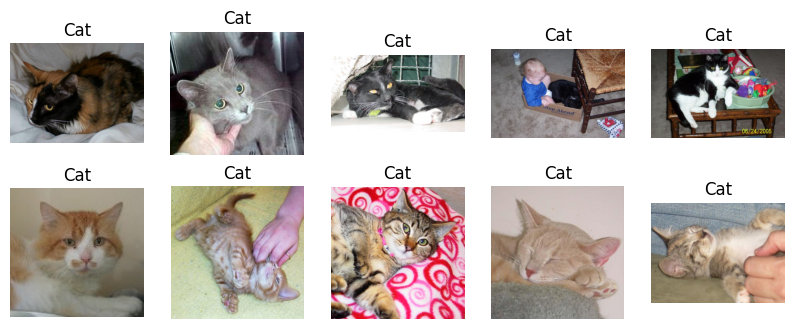

In [ ]:
# Display a grid of 10 random CAT images to understand the content of the dataset

plt.figure(figsize=(10, 10))  # Create a large figure to hold 10 images in a grid

# Filter the DataFrame to get paths of all cata images (label == 0)
temp = df[df['Label'] == 0]['Image']

# Choose a random starting point in the list
start = random.randint(0, len(temp) - 10)

# Select 10 consecutive image paths from that starting point
files = temp[start:start + 10]

# Loop through each selected image and plot it
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)      # Create a 5x5 grid position for the image
    img = load_img(file)              # Load the image
    img = np.array(img)               # Convert to a NumPy array for plotting
    plt.imshow(img)                   # Display the image
    plt.title('Cat')                  # Set title as 'Cat'
    plt.axis('off')                   # Hide axes for cleaner look


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   24998 non-null  object
 1   Label   24998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


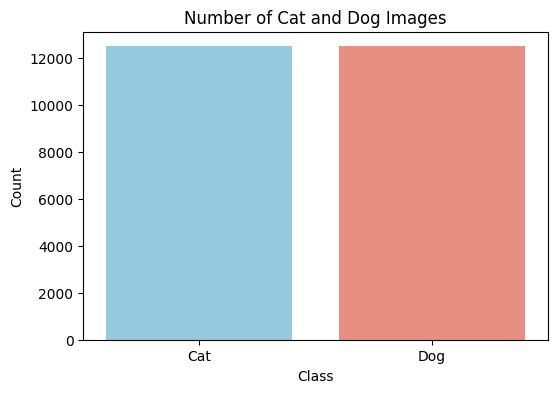

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df, palette={'0': 'skyblue', '1': 'salmon'})

# Customize the plot
plt.title("Number of Cat and Dog Images")
plt.xticks([0, 1], ['Cat', 'Dog'])
plt.xlabel("Class")
plt.ylabel("Count")

# Display
plt.show()

- We can observe an equal distribution of both classes.

## Split Dataset and Prepare for Data Generator

In [9]:
# Splitting the input
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)


### The function train_test_split() returns a tuple of two parts:
                  (train_data, test_data)